<a href="https://colab.research.google.com/github/shivamshukla-exe/amazon_sales_data/blob/main/Amazon_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Amazon Sales data.csv')

In [ ]:
print(data['Order Date'].head())

0    5/28/2010
1    8/22/2012
2     5/2/2014
3    6/20/2014
4     2/1/2013
Name: Order Date, dtype: object


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

In [ ]:
data.dropna(subset=['Order Date'], inplace=True)

In [ ]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['YearMonth'] = data['Order Date'].dt.to_period('M')

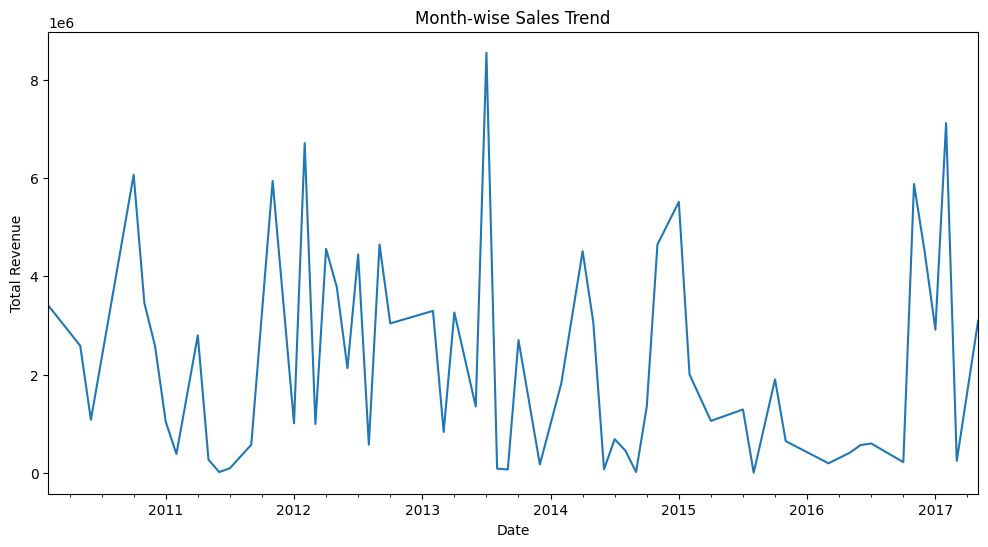

In [ ]:
#Monthy sales trend
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Month-wise Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

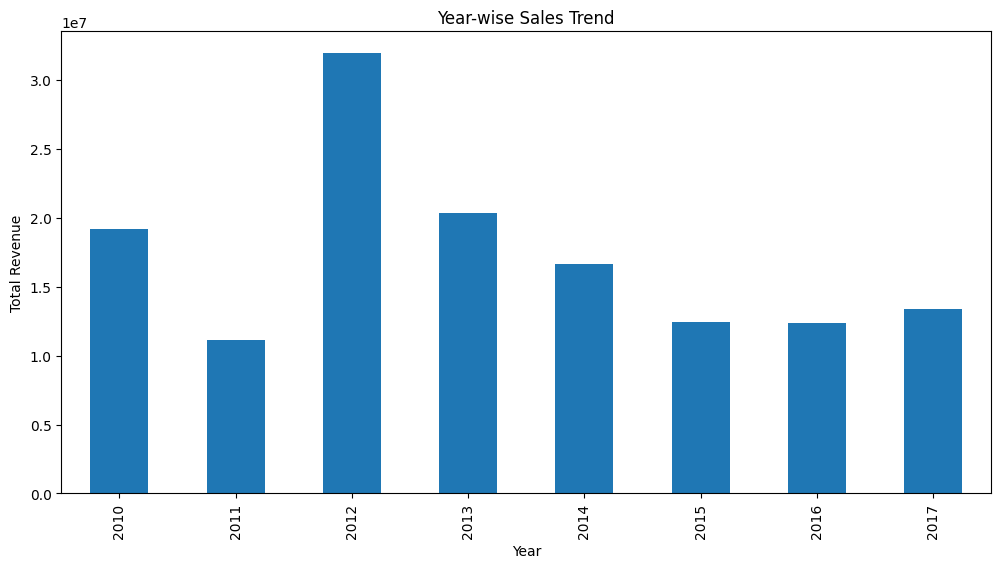

In [ ]:
# Yearly Sales trend
# Yearly Sales trend
yearly_sales = data.groupby(data['Order Date'].dt.year)['Total Revenue'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

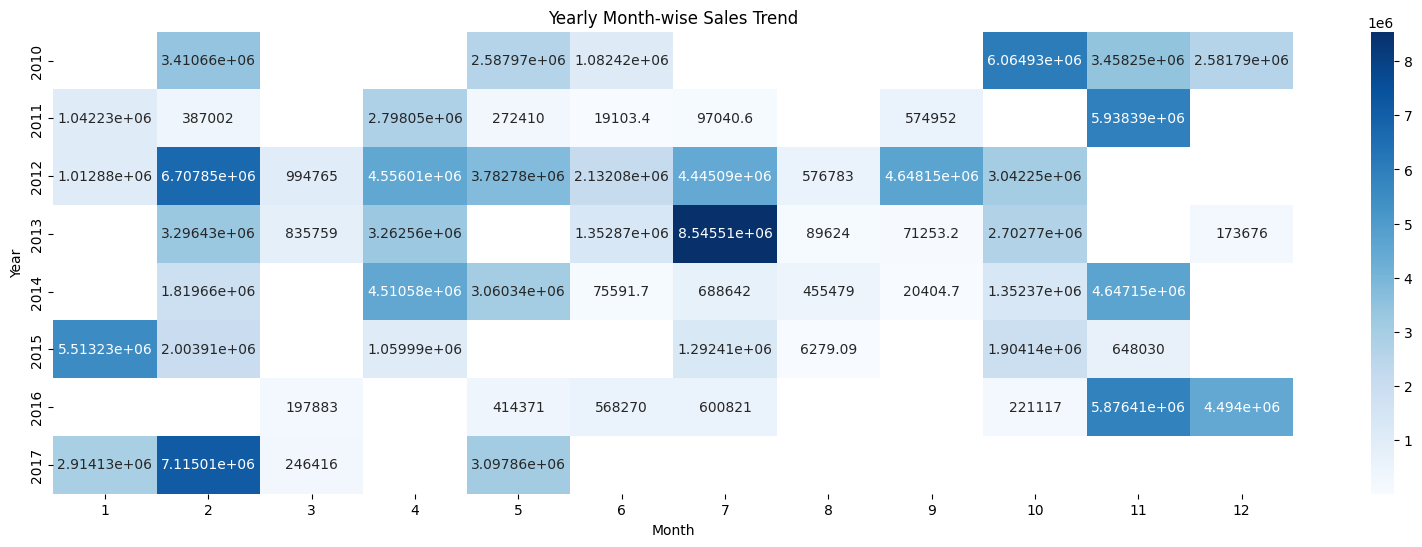

In [ ]:
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# Select only the 'Total Revenue' column before applying .sum()
year_month_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()

plt.figure(figsize=(20,6))
sns.heatmap(year_month_sales, cmap='Blues', annot=True, fmt='g')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
total_sales = data['Total Revenue'].sum()
average_sales = data['Total Revenue'].mean()
top_products = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)

In [ ]:
print(f'Total Sales: ${total_sales}')
print(f'Average Sales per Transaction: ${average_sales}')
print('Top 10 Products by Sales:')
print(top_products)

Total Sales: $137348768.31
Average Sales per Transaction: $1373487.6831
Top 10 Products by Sales:
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Name: Total Revenue, dtype: float64


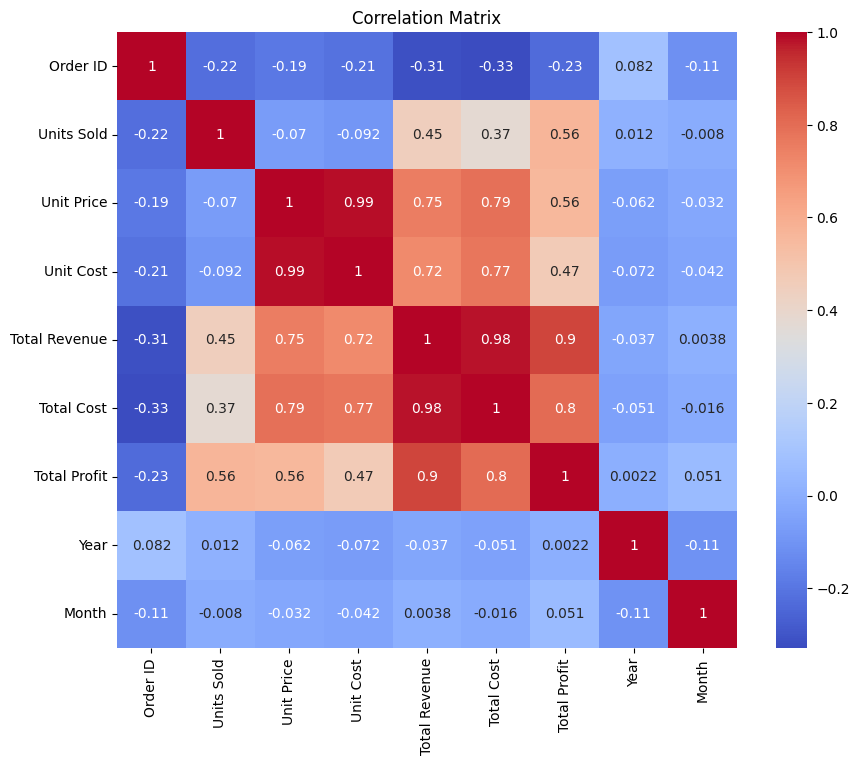

In [ ]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

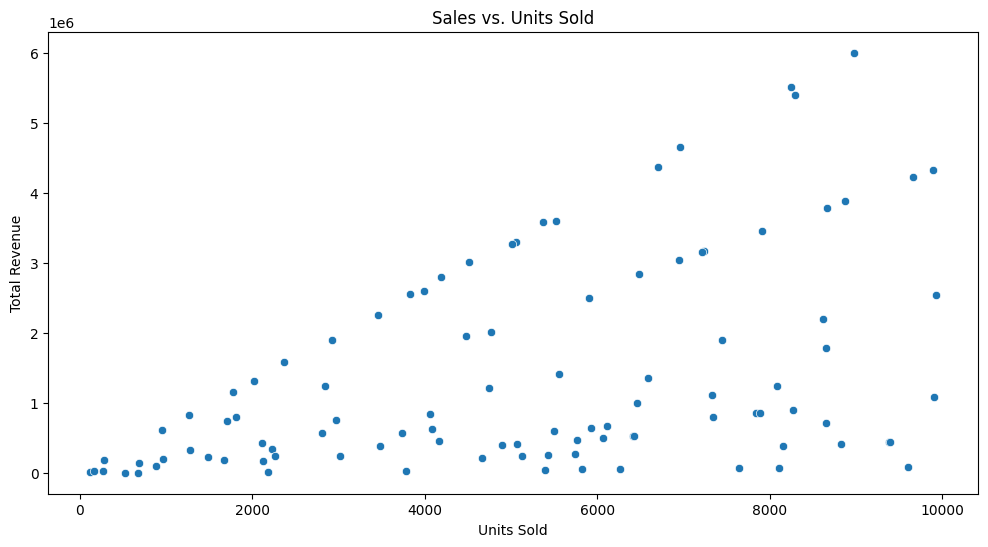

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Units Sold', y='Total Revenue', data=data)
plt.title('Sales vs. Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
data.to_csv('cleaned_amazon_sales_data.csv', index=False)

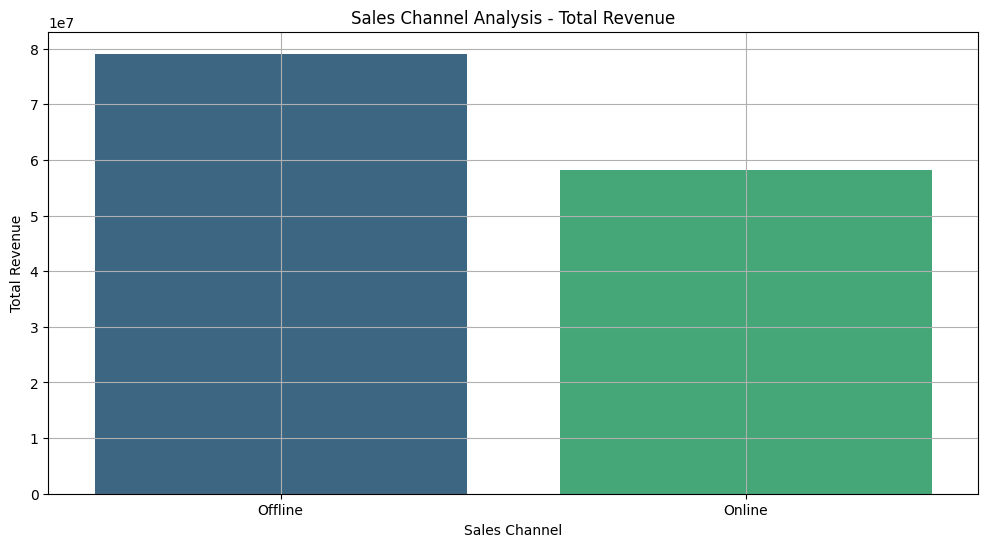

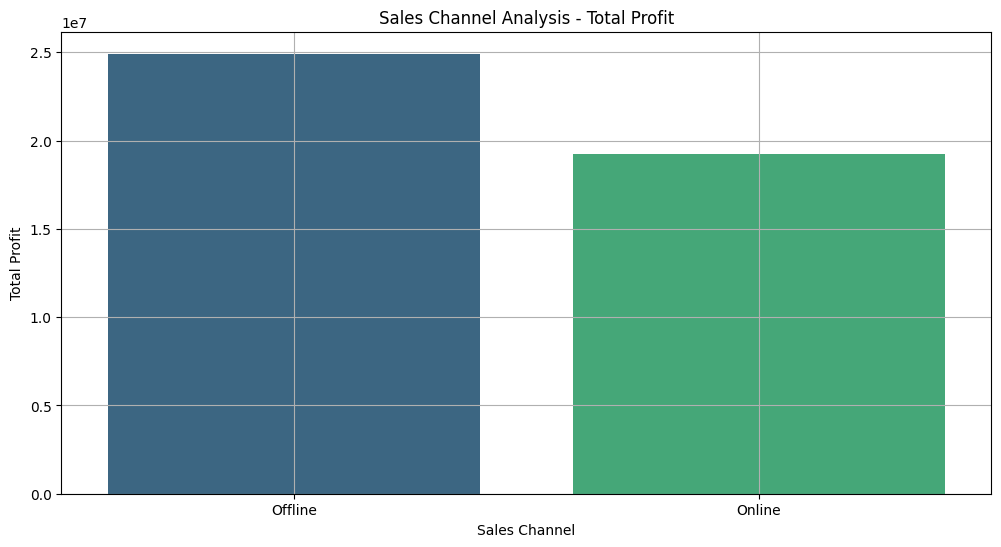

In [ ]:
# Group by Sales Channel and calculate total revenue and profit
sales_channel_analysis = data.groupby('Sales Channel')[['Total Revenue', 'Total Profit']].sum().reset_index()

# Plot Sales Channel Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Revenue',hue='Sales Channel', palette='viridis', dodge=False)
plt.title('Sales Channel Analysis - Total Revenue')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Profit',hue='Sales Channel', palette='viridis', dodge=False)
plt.title('Sales Channel Analysis - Total Profit')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()


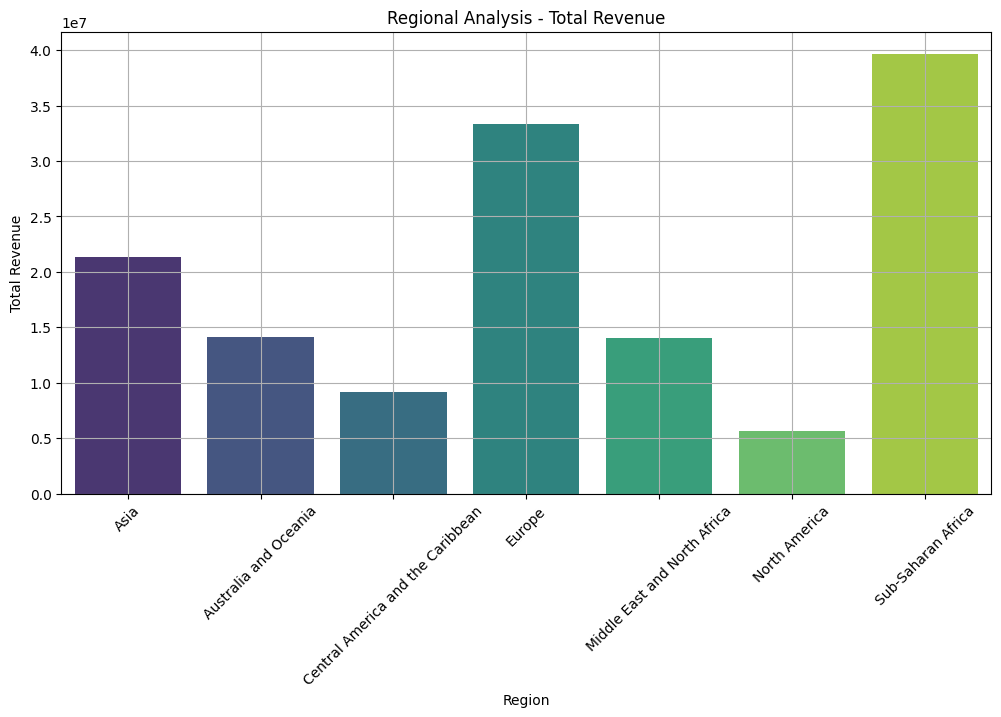

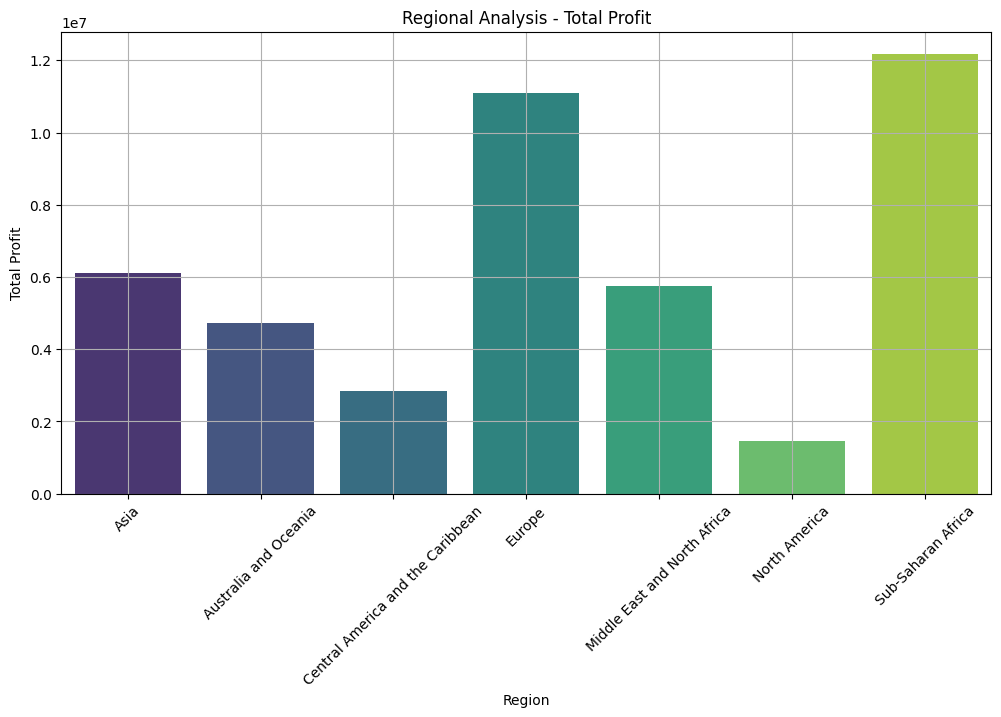

In [ ]:
# Group by Region and calculate total revenue and profit
region_analysis = data.groupby('Region')[['Total Revenue', 'Total Profit']].sum().reset_index()

# Plot Regional Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=region_analysis, x='Region', y='Total Revenue', hue='Region', palette='viridis', dodge=False)
plt.title('Regional Analysis - Total Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_analysis, x='Region', y='Total Profit', hue='Region', palette='viridis', dodge=False)
plt.title('Regional Analysis - Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


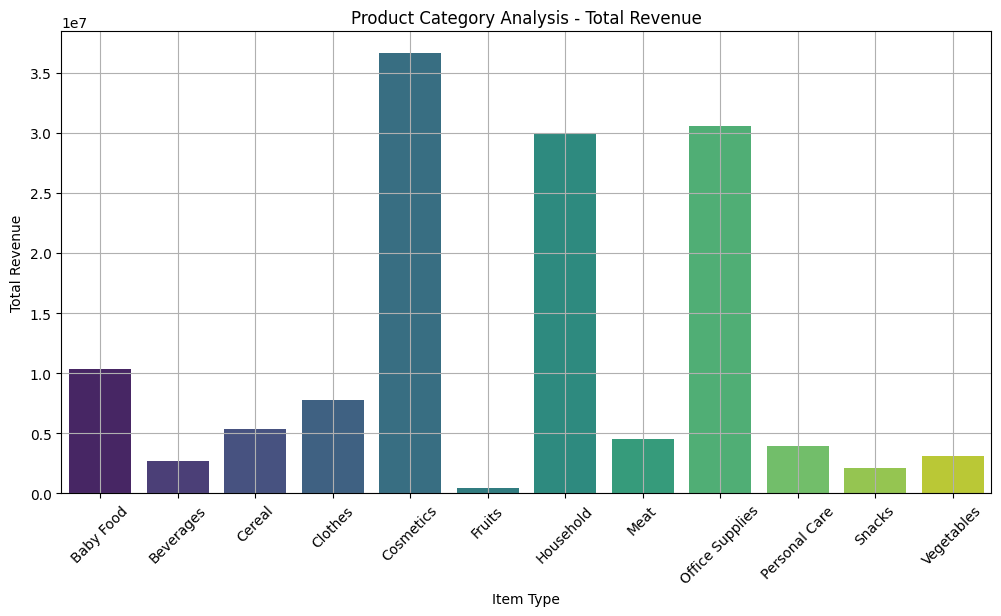

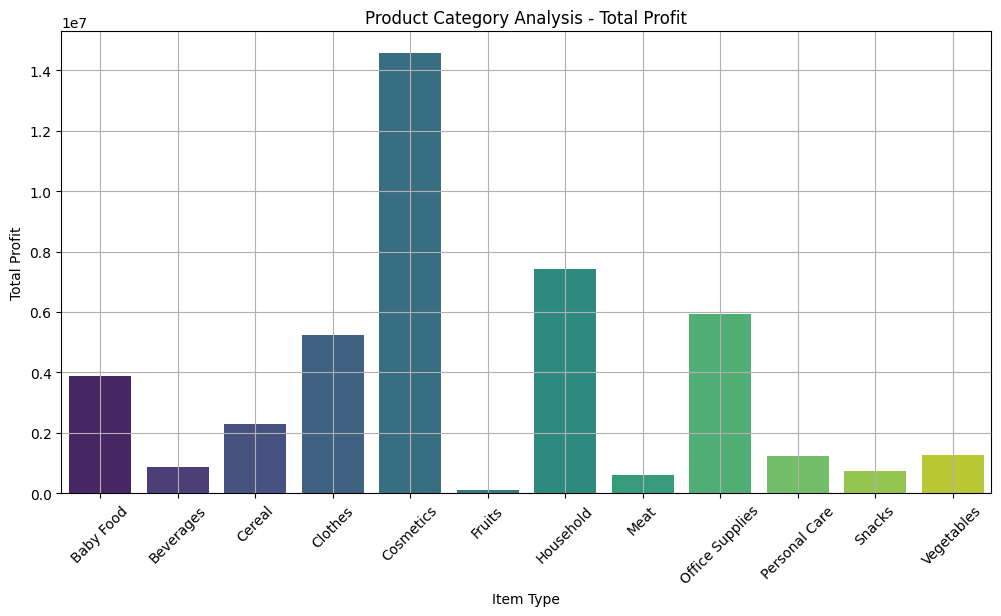

In [ ]:
# Group by Item Type and calculate total revenue and profit
item_type_analysis = data.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum().reset_index()

# Plot Item Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=item_type_analysis, x='Item Type', y='Total Revenue',hue='Item Type', palette='viridis', dodge=False)
plt.title('Product Category Analysis - Total Revenue')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=item_type_analysis, x='Item Type', y='Total Profit',hue='Item Type', palette='viridis', dodge=False)
plt.title('Product Category Analysis - Total Profit')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


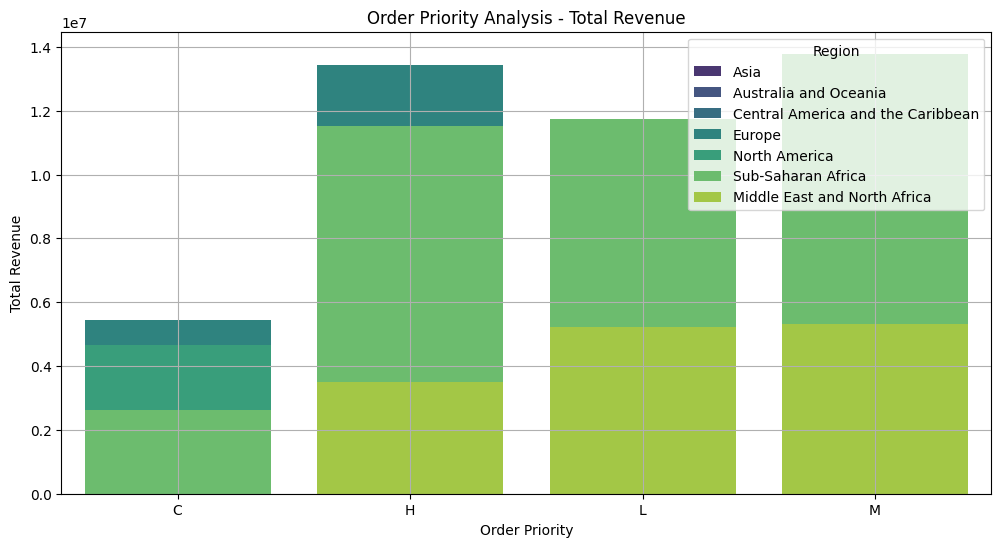

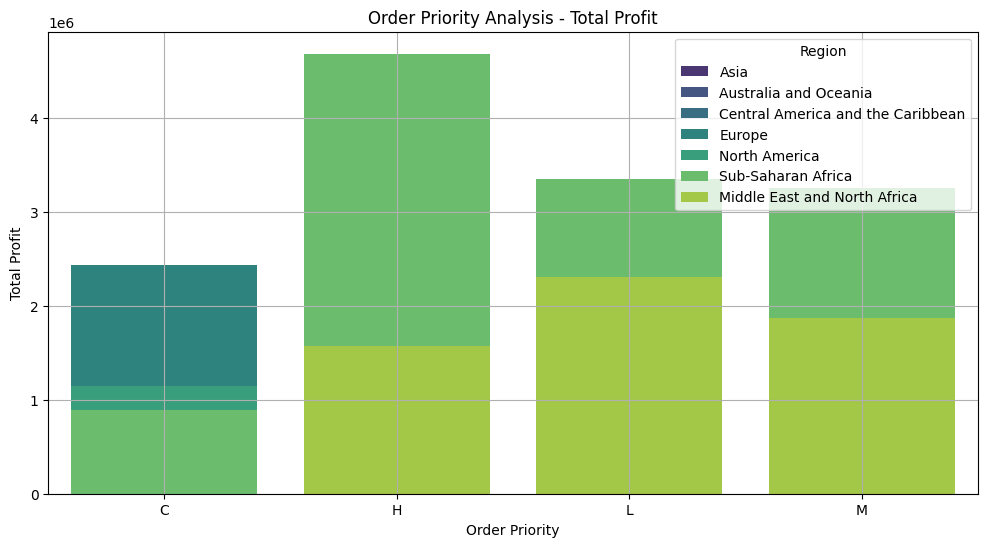

In [ ]:
# Group by Order Priority and calculate total revenue and profit
order_priority_analysis = data.groupby(['Order Priority','Region'])[['Total Revenue', 'Total Profit']].sum().reset_index()

# Plot Order Priority Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=order_priority_analysis, x='Order Priority', y='Total Revenue', hue='Region', palette='viridis', dodge=False)
plt.title('Order Priority Analysis - Total Revenue')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=order_priority_analysis, x='Order Priority', y='Total Profit',hue='Region', palette='viridis', dodge=False)
plt.title('Order Priority Analysis - Total Profit')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()
